<a href="https://colab.research.google.com/github/Pooja-ghode09/basic-sentiment-analysis-classifier/blob/main/assesment2_1basic_sentiment_analysis_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from google.colab import drive
from sklearn.metrics import accuracy_score

In [ ]:
nltk.download('vader_lexicon')

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Corona_NLP_test.csv'

In [ ]:
df = pd.read_csv(file_path)
print(df)

      UserName  ScreenName             Location     TweetAt  \
0            1       44953                  NYC  02-03-2020   
1            2       44954          Seattle, WA  02-03-2020   
2            3       44955                  NaN  02-03-2020   
3            4       44956          Chicagoland  02-03-2020   
4            5       44957  Melbourne, Victoria  03-03-2020   
...        ...         ...                  ...         ...   
3793      3794       48746            Israel ??  16-03-2020   
3794      3795       48747       Farmington, NM  16-03-2020   
3795      3796       48748        Haverford, PA  16-03-2020   
3796      3797       48749                  NaN  16-03-2020   
3797      3798       48750  Arlington, Virginia  16-03-2020   

                                          OriginalTweet           Sentiment  
0     TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1     When I couldn't find hand sanitizer at Fred Me...            Positive  
2     Fin

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       3798 non-null   int64 
 1   ScreenName     3798 non-null   int64 
 2   Location       2964 non-null   object
 3   TweetAt        3798 non-null   object
 4   OriginalTweet  3798 non-null   object
 5   Sentiment      3798 non-null   object
dtypes: int64(2), object(4)
memory usage: 178.2+ KB


In [ ]:
df.drop_duplicates(subset='OriginalTweet',inplace=True)

In [ ]:
sia = SentimentIntensityAnalyzer()

In [ ]:
def get_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [ ]:
df['PredictedSentiment'] = df['OriginalTweet'].apply(get_sentiment)

In [ ]:
print(df['PredictedSentiment'].value_counts())

PredictedSentiment
negative    1607
positive    1535
neutral      656
Name: count, dtype: int64


In [ ]:
sentiment_counts = df['PredictedSentiment'].value_counts()

In [ ]:
print(df[['OriginalTweet', 'Sentiment', 'PredictedSentiment']].head(10))

                                       OriginalTweet           Sentiment  \
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative   
1  When I couldn't find hand sanitizer at Fred Me...            Positive   
2  Find out how you can protect yourself and love...  Extremely Positive   
3  #Panic buying hits #NewYork City as anxious sh...            Negative   
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral   
5  Do you remember the last time you paid $2.99 a...             Neutral   
6  Voting in the age of #coronavirus = hand sanit...            Positive   
7  @DrTedros "We cant stop #COVID19 without prot...             Neutral   
8  HI TWITTER! I am a pharmacist. I sell hand san...  Extremely Negative   
9  Anyone been in a supermarket over the last few...  Extremely Positive   

  PredictedSentiment  
0           negative  
1           negative  
2           positive  
3           negative  
4            neutral  
5            neutral  
6 

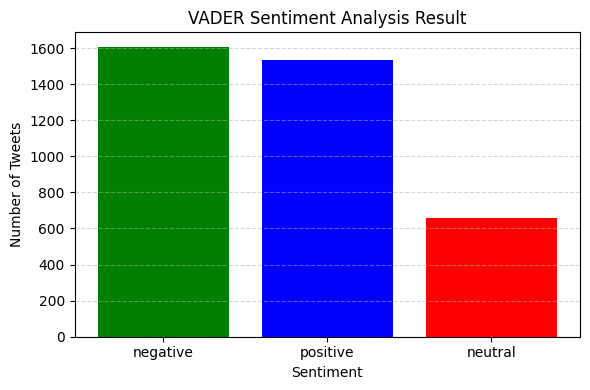

In [ ]:
plt.figure(figsize=(6, 4))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'blue', 'red'])
plt.title("VADER Sentiment Analysis Result")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

RNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)
x_train = pad_sequences(x_train, maxlen=100)
x_test = pad_sequences(x_test, maxlen=100)

In [ ]:
model = Sequential([
    Embedding(10000, 64, input_length=100),
    LSTM(64),
    Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_split=0.2)


Epoch 1/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 94ms/step - accuracy: 0.7095 - loss: 0.5347 - val_accuracy: 0.8368 - val_loss: 0.3741
Epoch 2/2
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 91ms/step - accuracy: 0.8935 - loss: 0.2692 - val_accuracy: 0.8396 - val_loss: 0.3695


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"✅ Test Accuracy: {accuracy:.4f}")

782/782 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.8372 - loss: 0.3762
✅ Test Accuracy: 0.8388
